In [107]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import sklearn.metrics as pm
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

iris_df = pd.read_csv(r'Business Intelligence & Data Management/Python/LabSession6/Iris.csv')

# path to Iris csv file

predictors = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Replace categorical values with dummy variables
X = pd.get_dummies(iris_df[predictors])

y = iris_df['species'].values

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)

In [113]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(X_train,y_train)

DecisionTreeClassifier()

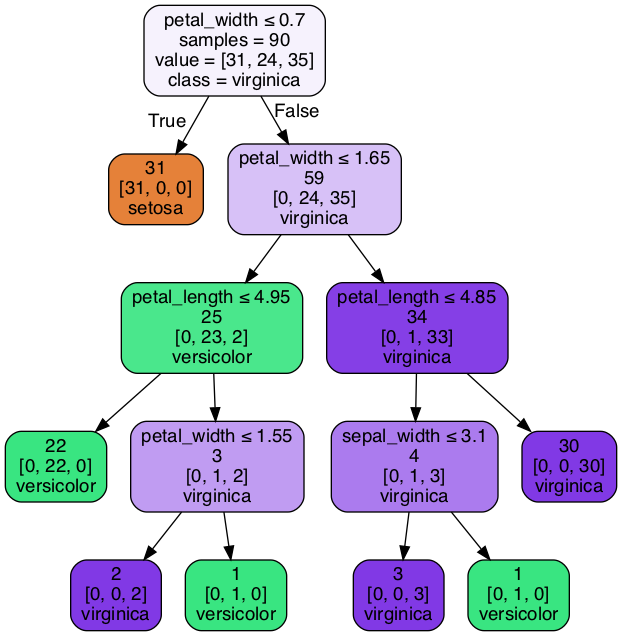

In [114]:
from dmba import plotDecisionTree
plotDecisionTree(fullClassTree,feature_names=X_train.columns, class_names=fullClassTree.classes_)

In [6]:
bankruptcy_df = pd.read_csv(r'Business Intelligence & Data Management/Python/LabSession6/Bankruptcy.csv')

In [7]:
bankruptcy_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'Class'], dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
x = bankruptcy_df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6']]
y = bankruptcy_df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
model_lr = GaussianNB()
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)

In [9]:
print(y_pred)
print(y_test)

[2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 1 1 1 1 1 2 1 1 1 1 2 2 2 1
 2 2 2 2 1 1 1 2 2 2 2 1 1 1 1 2 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 1 1 2 2 2 2
 2]
55     2
144    1
249    1
123    2
108    2
      ..
50     2
2      2
80     2
65     2
89     2
Name: Class, Length: 75, dtype: int64


In [10]:
print("Performance measures over testing data set:")
print(" o accuracy is ", pm.accuracy_score(y_test,y_pred))
print(" o precision is ", pm.precision_score(y_test, y_pred, pos_label=2))
print(" o recall is ", pm.recall_score(y_test, y_pred, pos_label=2))
print(" o f-measure is", pm.f1_score(y_test, y_pred, pos_label=2))

Performance measures over testing data set:
 o accuracy is  0.9733333333333334
 o precision is  0.9534883720930233
 o recall is  1.0
 o f-measure is 0.9761904761904763


In [11]:
tn, fp, fn, tp = pm.confusion_matrix(y_test,y_pred).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print("Precision: ", tp/(tp+fp))
print("Recall: ", tp/(tp+fn))
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))

True Negative:  32
False Positive:  2
False Negative:  0
True Positive:  41
Precision:  0.9534883720930233
Recall:  1.0
Accuracy:  0.9733333333333334


In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

In [29]:
pm.confusion_matrix(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [308, 75]

In [30]:
print(y_test)

[1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 0]


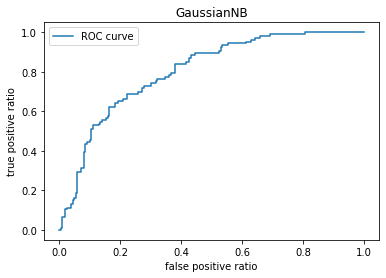

In [148]:
df = pd.read_csv(r'Business Intelligence & Data Management/Python/LabSession6/Diabetes.csv')

X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import sklearn.metrics
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train,y_train)

y_pred_proba_model_GaussianNB = model_GaussianNB.predict_proba(X_test)[:,1]

fpr_GaussianNB, tpr_GaussianNB, thresholds_GaussianNB = roc_curve(y_test, y_pred_proba_model_GaussianNB)

plt.plot(fpr_GaussianNB, tpr_GaussianNB, label='ROC curve')
plt.xlabel('false positive ratio')
plt.ylabel('true positive ratio')
plt.title('GaussianNB')
plt.legend()
plt.show()

In [32]:
sklearn.metrics.average_precision_score(y_test, y_pred_proba_model_GaussianNB, average='macro', pos_label=1, sample_weight=None)

0.625145437059806

In [70]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier(n_neighbors=10)
KNN_Model.fit(X_train,y_train)
y_pred_proba_KNN = KNN_Model.predict_proba(X_test)[:,1]
avg_prec_score_KNN = sklearn.metrics.average_precision_score(y_test, y_pred_proba_KNN)
print('Average precision score KNN: ', avg_prec_score_KNN)

Average precision score KNN:  0.5846738453636033


In [71]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
MNB_Model = MultinomialNB()
MNB_Model.fit(X_train,y_train)
y_pred_proba_MNB = MNB_Model.predict_proba(X_test)[:,1]
avg_prec_score_MNB = sklearn.metrics.average_precision_score(y_test, y_pred_proba_MNB)
print('Average precision score MNB: ', avg_prec_score_MNB)

Average precision score MNB:  0.4707144908687911


In [72]:
# GaussianNB
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train,y_train)
y_pred_proba_model_GaussianNB = model_GaussianNB.predict_proba(X_test)[:,1]
avg_prec_score_GNB = sklearn.metrics.average_precision_score(y_test, y_pred_proba_model_GaussianNB)
print('Average precision score GNB: ', avg_prec_score_GNB)

Average precision score GNB:  0.625145437059806


In [152]:
# Define ROC Curve values
fpr_GNB, tpr_GNB, thresholds_GaussianNB = roc_curve(y_test, y_pred_proba_model_GaussianNB)
fpr_MNB, tpr_MNB, thresholds_MNB = roc_curve(y_test, y_pred_proba_MNB)
fpr_KNN,tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_proba_KNN)

# Define area under curce (ROC curve values needed)
GNB_auc = auc(fpr_GNB, tpr_GNB)
MNB_auc = auc(fpr_MNB, tpr_MNB)
KNN_auc = auc(fpr_KNN, tpr_KNN)

print('Gaussian NB: ',GNB_auc)
print('Multinomial NB: ',MNB_auc)
print('KNeighbors: ',KNN_auc)

Gaussian NB:  0.8020736035867737
Multinomial NB:  0.6180179338688585
KNeighbors:  0.7497431346908275


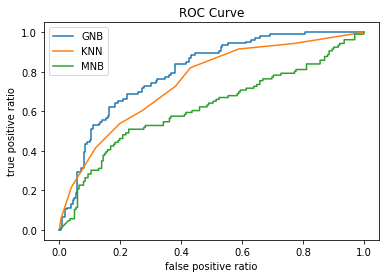

In [97]:
# Plot ROC Curves
plt.plot(fpr_GNB, tpr_GNB, label='GNB')
plt.plot(fpr_KNN, tpr_KNN, label='KNN')
plt.plot(fpr_MNB, tpr_MNB, label='MNB')
plt.xlabel('false positive ratio')
plt.ylabel('true positive ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [98]:
# Import libraries for Decision Tree
%matplotlib inline
from pathlib import Path
import pandas as pd
import sklearn.metrics as pm
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from dmba import plotDecisionTree

In [154]:
# Import UniversalBank.csv
Bank_df = pd.read_csv(r'Business Intelligence & Data Management/Python/LabSession6/UniversalBank.csv')

#Delete columns
del Bank_df['ID']
del Bank_df['ZIP Code']

#Define X and y (without .values for X in case of decision tree)
X = Bank_df.drop('Personal Loan', axis=1)
y = Bank_df['Personal Loan'].values

In [159]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=0)

# Train Decision Tree Classifier and train model
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(X_train,y_train)


DecisionTreeClassifier()

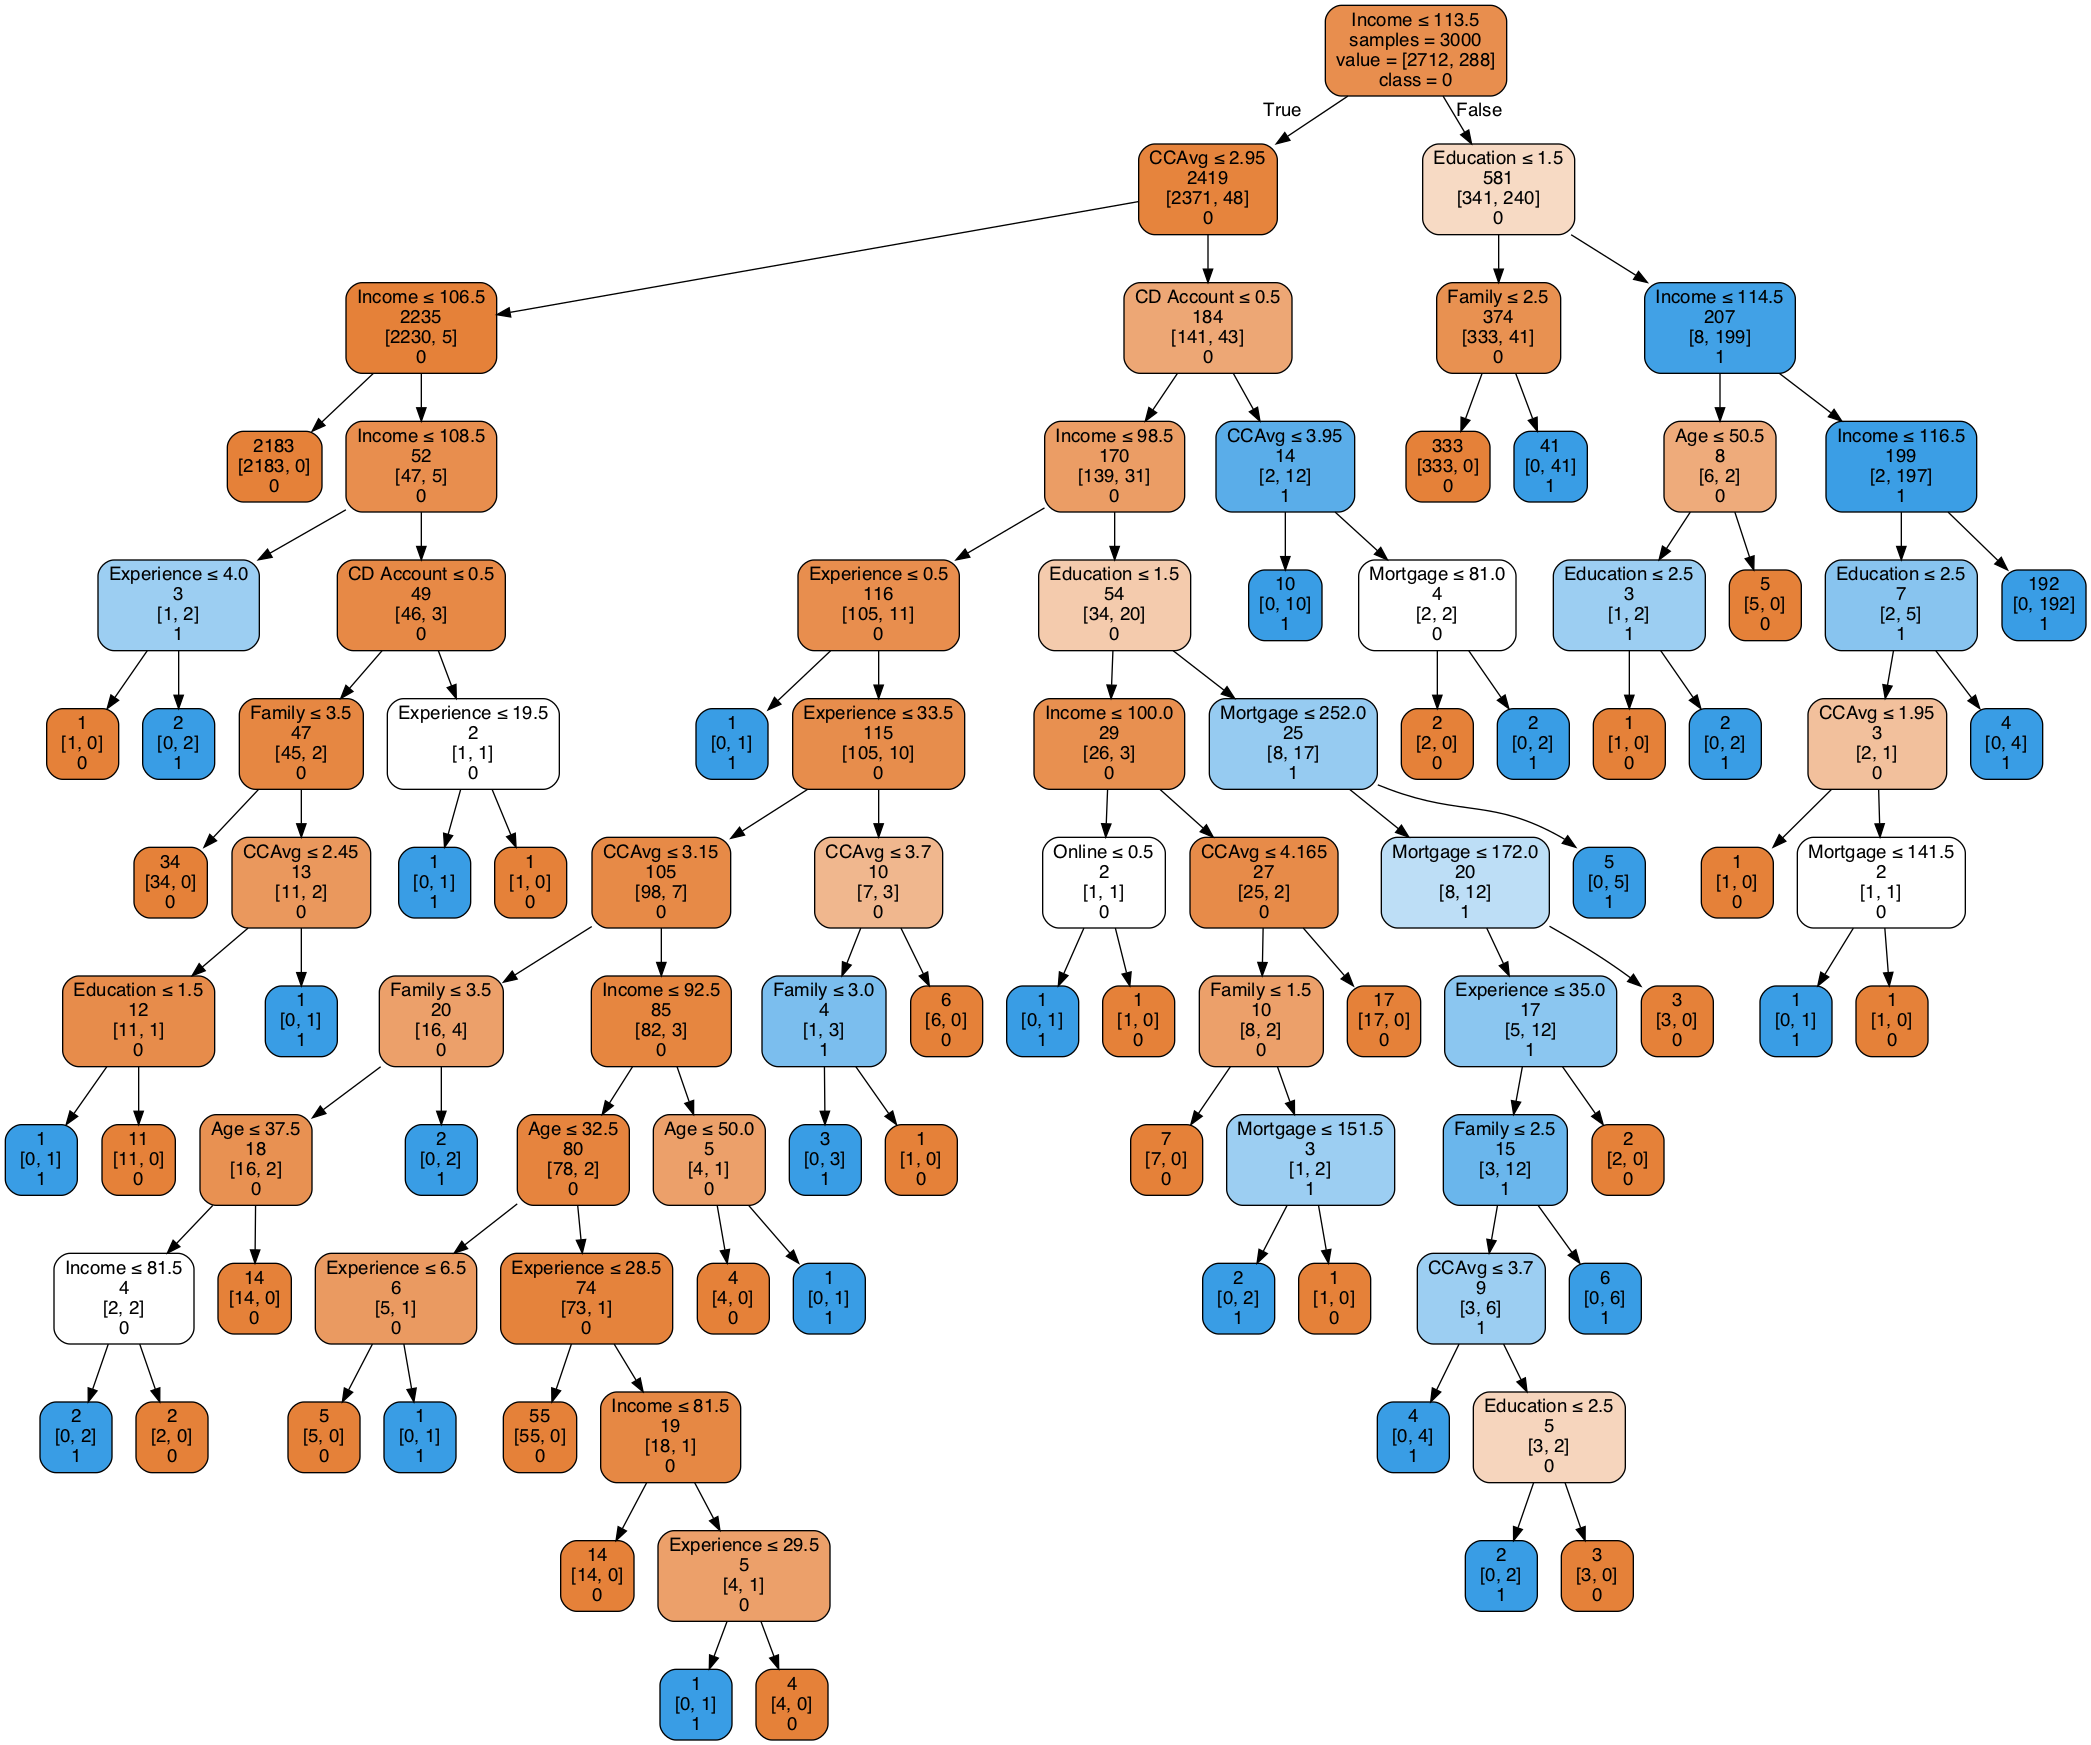

In [160]:
# Plot trained Decision Tree
plotDecisionTree(fullClassTree,feature_names=X_train.columns, class_names=fullClassTree.classes_)

In [163]:
# Predict for X_test on model fullClassTree
y_pred = fullClassTree.predict(X_test)

pm.precision_score(y_test, y_pred)

0.8854166666666666

True Negative:  1786
False Positive:  22
False Negative:  22
True Positive:  170
Accuracy:  0.978


array([[1786,   22],
       [  22,  170]])

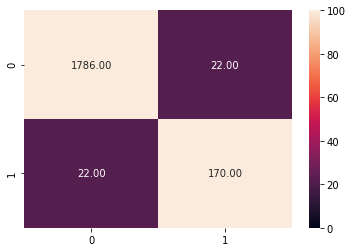

In [164]:
tn, fp, fn, tp = pm.confusion_matrix(y_test,y_pred).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(pm.confusion_matrix(y_test,y_pred), annot=True, vmin=0, vmax=100, fmt='.2f')
pm.confusion_matrix(y_test,y_pred)